In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

from codecarbon import EmissionsTracker
import shap

c:\Users\F8091795\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\F8091795\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\F8091795\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/cor

In [2]:
arquivos = ['Interpolado_Marambaia.csv', 'Interpolado_VilaMilitar.csv', 'Interpolado_jacarepagua.csv']
dfs = [pd.read_csv(a, sep=',', encoding='utf8') for a in arquivos]
df = pd.concat(dfs, ignore_index=True)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.sort_values(['datetime'], ignore_index=True)
df


,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",datetime
0,0.0,1021.400000,1021.400000,1021.100000,0.0,18.200000,15.700000,18.200000,18.0,15.800000,15.40,86.000000,85.0,86.0,28.0,3.8,2.000000,2002-11-08 00:00:00
1,0.0,1021.900000,1022.000000,1021.400000,0.0,18.500000,16.200000,18.600000,18.2,16.300000,15.70,87.000000,85.0,87.0,348.0,5.9,2.500000,2002-11-08 01:00:00
2,3.6,1021.700000,1022.500000,1021.700000,0.0,17.800000,15.900000,18.500000,17.6,16.400000,15.40,89.000000,86.0,89.0,17.0,6.1,2.500000,2002-11-08 02:00:00
3,0.0,1020.900000,1021.700000,1020.900000,0.0,17.400000,15.700000,17.800000,17.4,15.900000,15.70,90.000000,89.0,90.0,29.0,3.0,1.800000,2002-11-08 03:00:00
4,0.0,1020.300000,1020.800000,1020.300000,0.0,17.200000,15.600000,17.400000,17.2,15.800000,15.60,91.000000,90.0,91.0,2.0,3.9,2.400000,2002-11-08 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414824,0.0,1017.800000,1017.800000,1017.400000,3.7,20.700000,17.900000,20.800000,20.1,17.900000,17.50,85.000000,82.0,84.0,256.0,3.5,0.800000,2025-05-31 21:00:00
414825,0.0,1018.200000,1018.200000,1017.700000,0.0,21.400000,17.900000,21.400000,20.7,18.000000,17.90,84.000000,80.0,81.0,237.0,6.2,1.600000,2025-05-31 22:00:00
414826,0.0,1019.088889,1019.088889,1018.533333,0.0,20.009091,18.066667,21.009091,20.2,18.585714,17.35,85.857143,78.0,86.0,47.0,7.6,2.376190,2025-05-31 22:00:00
414827,0.0,1019.733333,1019.733333,1019.000000,0.0,19.254545,18.300000,20.754545,19.7,18.614286,16.80,86.142857,70.0,89.0,81.0,10.6,6.257143,2025-05-31 23:00:00


In [3]:
X_prec = df[[
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 
       'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)'
    ]]

y_prec = df[['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']]

In [4]:

X_temp = df[[
       'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 
       'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)'
    ]]

y_temp = df[['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']]

In [5]:
X_umid = df[[
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 
       'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)'
    ]]

y_umid = df[['UMIDADE RELATIVA DO AR, HORARIA (%)']]

In [6]:
def split_train_test(X, y, train_size):
    X_train, X_test = X[:round(X.shape[0]*train_size)], X[round(X.shape[0]*train_size):]
    y_train, y_test = y[:round(y.shape[0]*train_size)], y[round(y.shape[0]*train_size):]

    return X_train, X_test, y_train, y_test

def plot_prediction_over_time(y_test, predictions, timestamps, start_date=None, end_date=None, save=False):
    timestamps = pd.to_datetime(timestamps)

    data = pd.DataFrame({
        'Timestamp': timestamps,
        'Actual': y_test,
        'Predicted': predictions
    })

    if start_date:
        data = data[data['Timestamp'] >= pd.to_datetime(start_date)]
    if end_date:
        data = data[data['Timestamp'] <= pd.to_datetime(end_date)]

    plt.figure(figsize=(12, 6))
    plt.plot(data['Timestamp'], data['Actual'], label='Actual Values', color='blue', linewidth=2)
    plt.plot(data['Timestamp'], data['Predicted'], label='Predicted Values', color='orange', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title('Actual vs. Predicted Values Over Time')
    plt.legend()
    plt.grid(True)

    
    if save: 
        plt.savefig(save)
        
    plt.show()


def plot_real_vs_predicted(y_test, predictions, save=False):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, predictions, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2, label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Real vs Predicted Values")
    plt.legend()
    plt.grid(True)

    if save: 
        plt.savefig(save)
    
    plt.show()

In [7]:
scaler_X = StandardScaler()
X_temp_normalized = scaler_X.fit_transform(X_temp)

scaler_y = StandardScaler()
y_temp_normalized = scaler_y.fit_transform(y_temp)

In [8]:
X_temp_train, X_temp_test, y_temp_train, y_temp_test = split_train_test(X_temp, y_temp, train_size=0.8)


In [9]:
model = tf.keras.Sequential([
    Dense(X_temp.shape[1], activation='relu', input_shape=(X_temp.shape[1], )),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

c:\Users\F8091795\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
tracker = EmissionsTracker(
    project_name="mlp temperature train",
    output_file='./codecarbon_emissions_mlp_temperatura_jac_mar_vm.csv',
    log_level = "critical"
)

tracker.start()


model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mean_absolute_error'] 
)

model.summary()

model.fit(X_temp_train, y_temp_train, epochs=100, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_temp_test, y_temp_test, verbose=2)
print(f"Loss (MSE): {loss}")
print(f"Mean Absolute Error: {mae}")


rmse = np.sqrt(loss)
print(f"Root Mean Squared Error (RMSE): {rmse}")


emissions: float = tracker.stop()
print(f"emissions={emissions}")

[codecarbon WARNING @ 23:17:24] Multiple instances of codecarbon are allowed to run at the same time.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 549 (2.14 KB)

 Trainable params: 549 (2.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 352.8624 - mean_absolute_error: 3.5717
Epoch 2/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 98.1870 - mean_absolute_error: 2.8165
Epoch 3/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 13.1298 - mean_absolute_error: 2.7067
Epoch 4/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 11.3056 - mean_absolute_error: 2.6290
Epoch 5/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 10.6687 - mean_absolute_error: 2.5766
Epoch 6/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 10.1898 - mean_absolute_error: 2.5298
Epoch 7/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 9.7055 - mean_absolute_error: 2.4858
Epoch 8/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 9.5136 - mean_absolute_error: 2.4677
Epoch 9/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 9.4503 - mean_absolute_error: 2.4622
Epoch 10/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss:

In [11]:
y_temp_pred_probs = model.predict(X_temp_test, verbose=2)


2593/2593 - 2s - 931us/step


In [12]:
y_temp_test_flat = y_temp_test.values.flatten()
y_temp_pred_flat = y_temp_pred_probs.flatten()

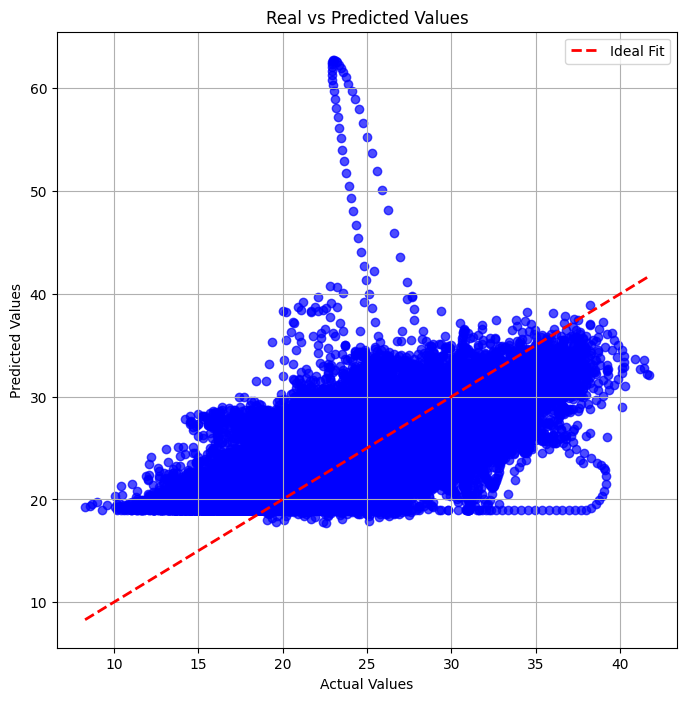

In [13]:
plot_real_vs_predicted(y_temp_test_flat, y_temp_pred_flat, save=r'C:\Users\F8091795\OneDrive - TIM\Pictures\mlp_temp_real_x_pred_integrada.png')


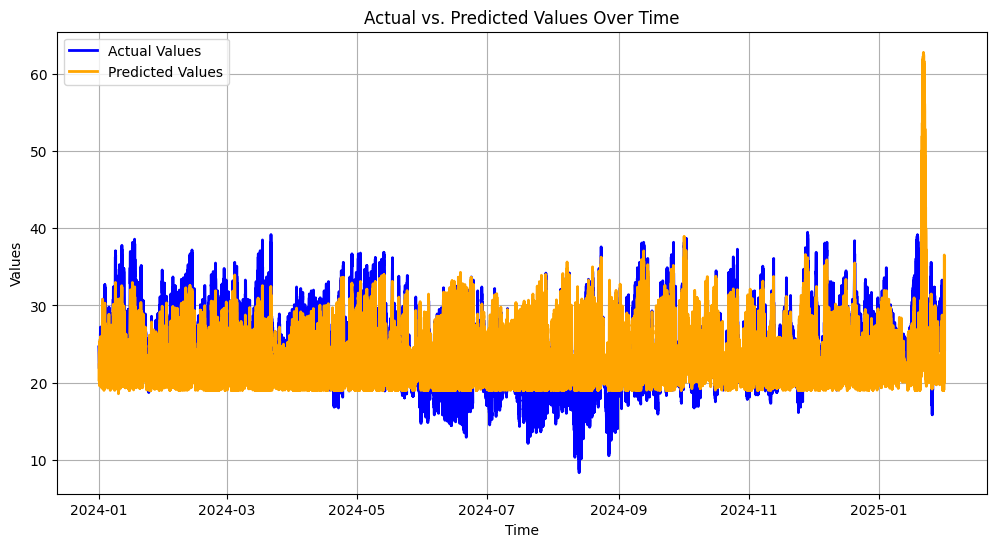

In [14]:
start_date = "2024-01-01 01:00:00"
end_date = "2025-01-31 23:00:00"

df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
timestamps_test = df.iloc[round(df.shape[0] * 0.8):]["datetime"]

plot_prediction_over_time(y_temp_test_flat, y_temp_pred_flat, timestamps_test, start_date, end_date, save=r'C:\Users\F8091795\OneDrive - TIM\Pictures\mlp_temp_over_time_integrada.png')

In [22]:
def model_predict_flat(X):
    return model.predict(X).flatten()


In [27]:
explainer = shap.KernelExplainer(model_predict_flat, X_temp_train[300000:300100])
shap_values = explainer.shap_values(X_temp_test[:100])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 2s 527us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 2s 609us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 2s 531us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 3s 804us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 2s 752us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 6s 894us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 3s 785us/step
1/1 ━━

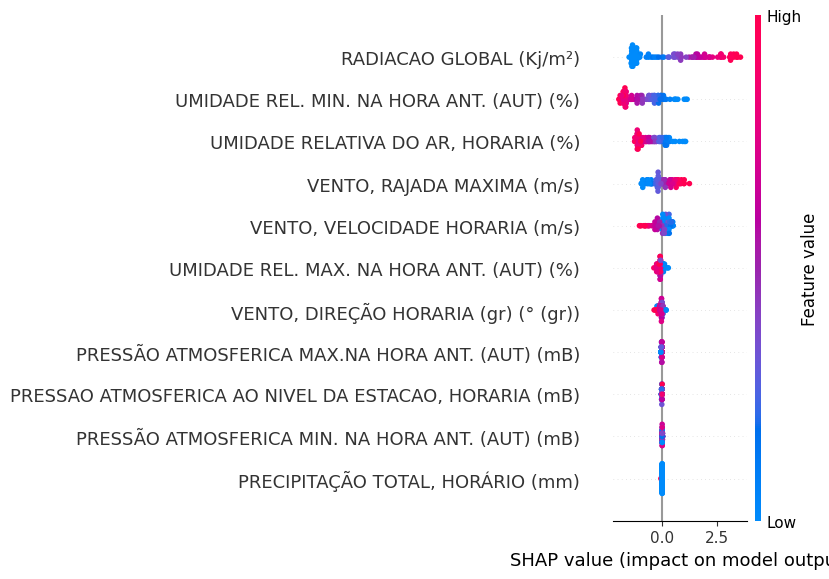

In [29]:
shap.summary_plot(shap_values, X_temp_test[:100])

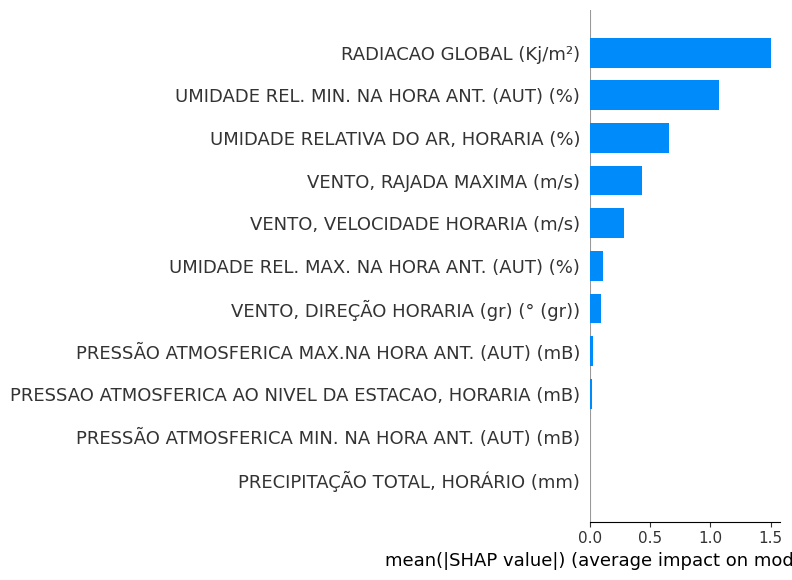

In [32]:
shap.summary_plot(shap_values, X_temp_test[:100], plot_type="bar", feature_names=X_temp.columns)


In [33]:
scaler_X = StandardScaler()
X_temp_normalized = scaler_X.fit_transform(X_prec)

scaler_y = StandardScaler()
y_temp_normalized = scaler_y.fit_transform(y_prec)

In [34]:
X_prec_train, X_prec_test, y_prec_train, y_prec_test = split_train_test(X_prec, y_prec, train_size=0.8)


In [35]:
model = tf.keras.Sequential([
    Dense(X_prec.shape[1], activation='relu', input_shape=(X_prec.shape[1], )),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

c:\Users\F8091795\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
tracker = EmissionsTracker(
    project_name="mlp PRECIPITATION 100ep final",
    output_file='./codecarbon_emissions_mlp_temperatura_jac_mar_vm.csv',
    log_level = "critical"
)

tracker.start()

model.compile(
    loss='mean_squared_error', 
    optimizer='adam',
    metrics=['mean_absolute_error']  
)

model.summary()

model.fit(X_prec_train, y_prec_train, epochs=100, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_prec_test, y_prec_test, verbose=2)
print(f"Loss (MSE): {loss}")
print(f"Mean Absolute Error: {mae}")


rmse = np.sqrt(loss)
print(f"Root Mean Squared Error (RMSE): {rmse}")


emissions: float = tracker.stop()
print(f"emissions={emissions}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 849 (3.32 KB)

 Trainable params: 849 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.1594 - mean_absolute_error: 0.2348
Epoch 2/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.1588 - mean_absolute_error: 0.2339
Epoch 3/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 1.1576 - mean_absolute_error: 0.2345
Epoch 4/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 1.1555 - mean_absolute_error: 0.2312
Epoch 5/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 1.1476 - mean_absolute_error: 0.2331
Epoch 6/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 1.1536 - mean_absolute_error: 0.2315
Epoch 7/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 1.1504 - mean_absolute_error: 0.2310
Epoch 8/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.1303 - mean_absolute_error: 0.2244
Epoch 9/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1.1447 - mean_absolute_error: 0.2303
Epoch 10/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.1269

In [38]:
rmse = np.sqrt(loss)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 6.810695864265088


In [39]:
y_prec_pred_probs = model.predict(X_prec_test, verbose=2)

2593/2593 - 3s - 1ms/step


In [40]:
y_prec_test_flat = y_prec_test.values.flatten()
y_prec_pred_flat = y_prec_pred_probs.flatten()

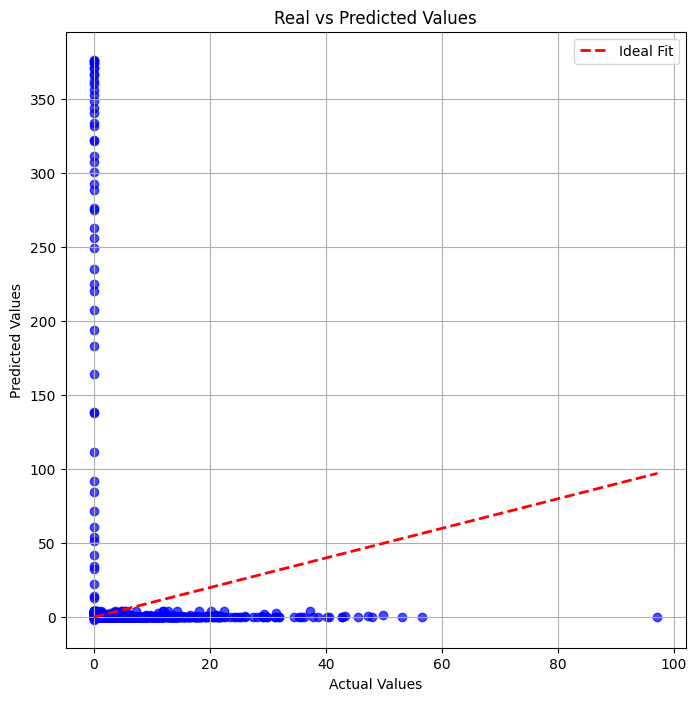

In [41]:
plot_real_vs_predicted(y_prec_test_flat, y_prec_pred_flat, save=r'C:\Users\F8091795\OneDrive - TIM\Pictures\mlp_prec_real_x_pred_integrada.png')


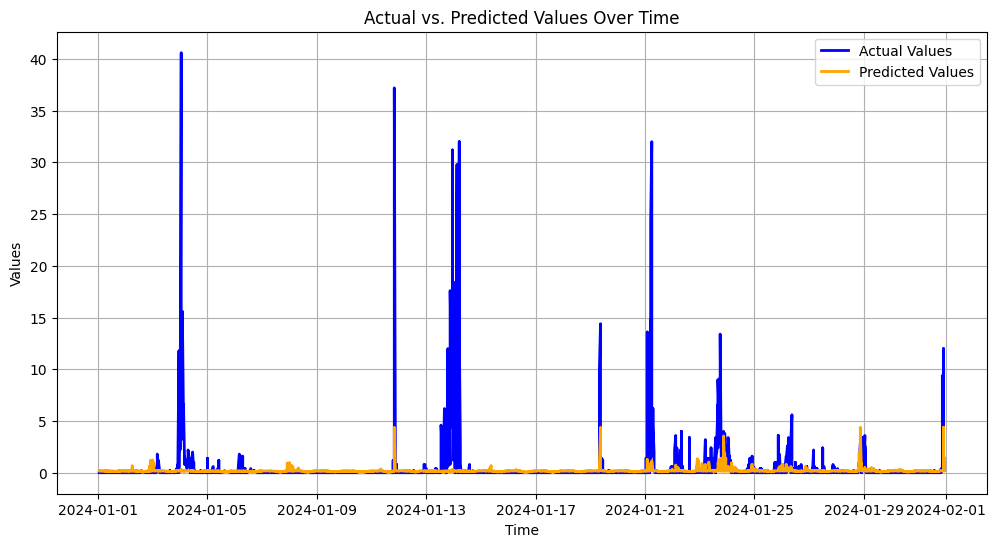

In [42]:
start_date = "2024-01-01 01:00:00"
end_date = "2024-01-31 23:00:00"

timestamps_test = df.iloc[round(df.shape[0] * 0.8):]["datetime"]

plot_prediction_over_time(y_prec_test_flat, y_prec_pred_flat, timestamps_test, start_date, end_date,  save=r'C:\Users\F8091795\OneDrive - TIM\Pictures\mlp_prec_Integrada_2024-01.png')

In [43]:
explainer = shap.KernelExplainer(model_predict_flat, X_prec_train[:100])
shap_values = explainer.shap_values(X_prec_test[:100])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 6s 977us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 5s 726us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 6s 926us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 6s 989us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━

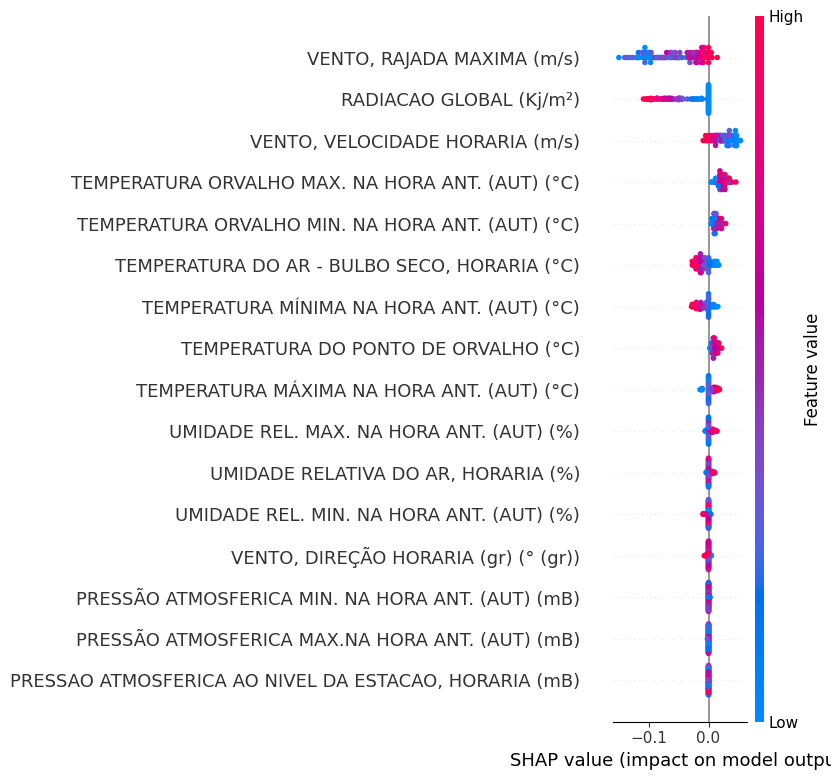

In [44]:
shap.summary_plot(shap_values, X_prec_test[:100])

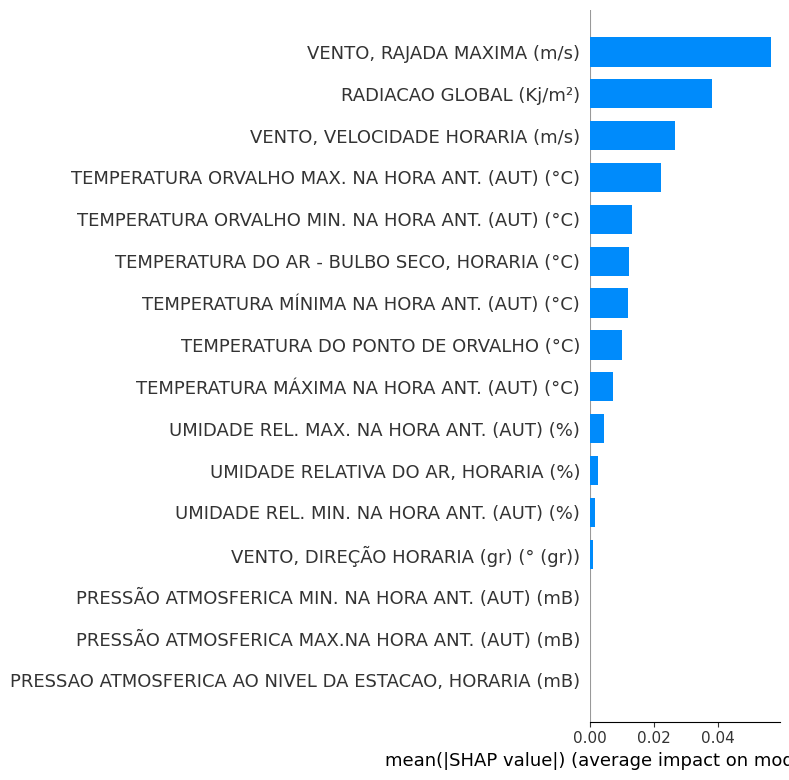

In [46]:
shap.summary_plot(shap_values, X_prec_test[:100], plot_type="bar", feature_names=X_prec.columns)


In [47]:
scaler_X = StandardScaler()
X_temp_normalized = scaler_X.fit_transform(X_umid)

scaler_y = StandardScaler()
y_temp_normalized = scaler_y.fit_transform(y_umid)

In [48]:
X_umid_train, X_umid_test, y_umid_train, y_umid_test = split_train_test(X_umid, y_umid, train_size=0.8)


In [49]:
model = tf.keras.Sequential([
    Dense(X_umid.shape[1], activation='relu', input_shape=(X_umid.shape[1], )),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

c:\Users\F8091795\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
tracker = EmissionsTracker(
    project_name="mlp PRECIPITATION 100ep final",
    output_file='./codecarbon_emissions_mlp_temperatura_Maramaia.csv',
    log_level = "critical"
)

tracker.start()

model.compile(
    loss='mean_squared_error', 
    optimizer='adam',
    metrics=['mean_absolute_error']  
)

model.summary()

model.fit(X_umid_train, y_umid_train, epochs=100, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_umid_test, y_umid_test, verbose=2)
print(f"Loss (MSE): {loss}")
print(f"Mean Absolute Error: {mae}")


rmse = np.sqrt(loss)
print(f"Root Mean Squared Error (RMSE): {rmse}")


emissions: float = tracker.stop()
print(f"emissions={emissions}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 663 (2.59 KB)

 Trainable params: 663 (2.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 444.5543 - mean_absolute_error: 7.6408 
Epoch 2/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 96.0755 - mean_absolute_error: 4.4319
Epoch 3/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 74.5673 - mean_absolute_error: 4.1506
Epoch 4/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 70.4950 - mean_absolute_error: 3.9691
Epoch 5/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 67.3807 - mean_absolute_error: 3.8739
Epoch 6/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 63.4839 - mean_absolute_error: 3.7191
Epoch 7/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 63.6917 - mean_absolute_error: 3.6933
Epoch 8/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 61.8457 - mean_absolute_error: 3.6253
Epoch 9/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 61.1492 - mean_absolute_error: 3.5717
Epoch 10/100
10371/10371 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - l

In [51]:
rmse = np.sqrt(loss)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 13.667935816443604


In [52]:
y_umid_pred_probs = model.predict(X_umid_test, verbose=2)

2593/2593 - 3s - 990us/step


In [53]:
y_umid_test_flat = y_umid_test.values.flatten()
y_umid_pred_flat = y_umid_pred_probs.flatten()

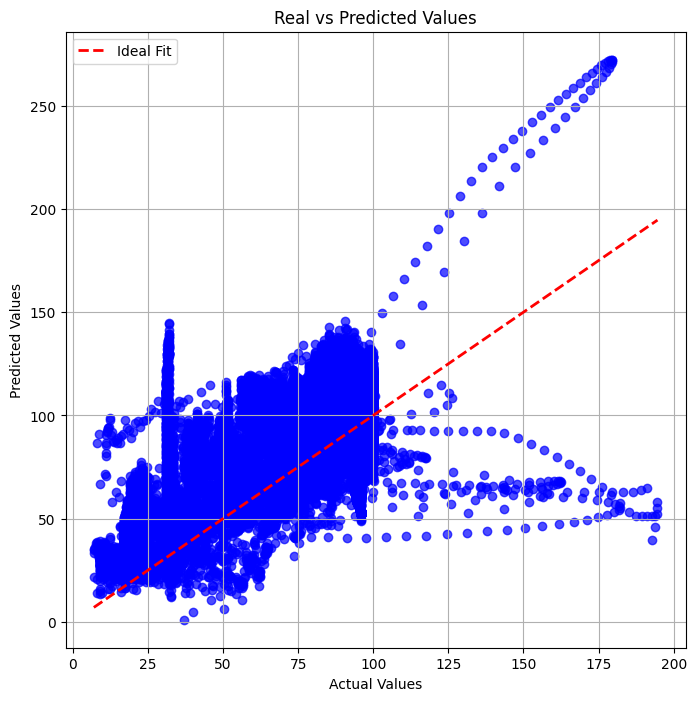

In [54]:
plot_real_vs_predicted(y_umid_test_flat, y_umid_pred_flat, save=r'C:\Users\F8091795\OneDrive - TIM\Pictures\mlp_umid_real_x_pred_integrada.png')


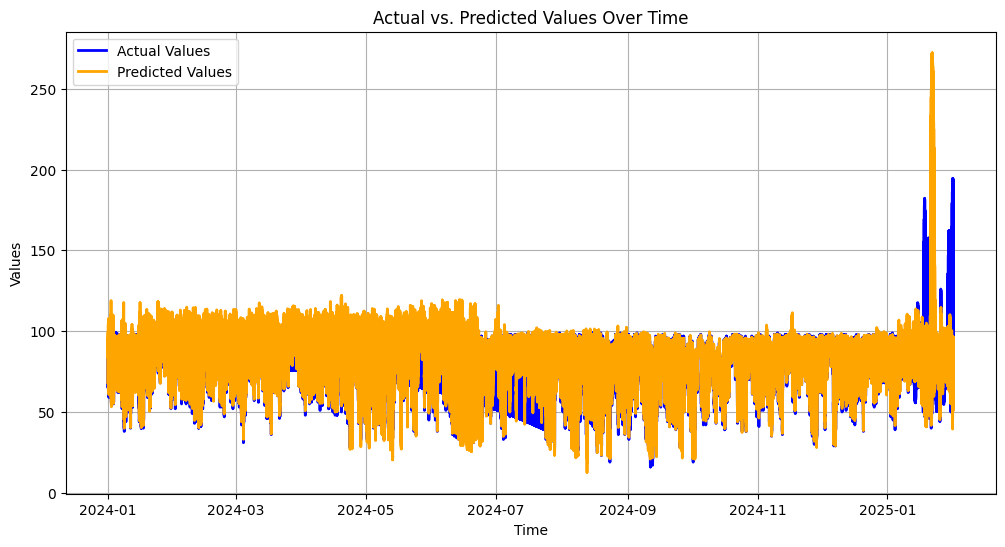

In [55]:
start_date = "2024-01-01 01:00:00"
end_date = "2025-01-31 23:00:00"

timestamps_test = df.iloc[round(df.shape[0] * 0.8):]["datetime"]

plot_prediction_over_time(y_umid_test_flat, y_umid_pred_flat, timestamps_test, start_date, end_date,  save=r'C:\Users\F8091795\OneDrive - TIM\Pictures\mlp_umid_real_x_pred_integrada_2024-2025.png')

In [56]:
explainer = shap.KernelExplainer(model_predict_flat, X_umid_train[:100])
shap_values = explainer.shap_values(X_umid_test[:100])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6475/6475 ━━━━━━━━━━━━━━━━━━━━ 6s 923us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 6s 898us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 5s 755us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 5s 702us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 4s 684us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 5s 728us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 5s 821us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 5s 696us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 5s 692us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 5s 796us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 5s 739us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6482/6482 ━━━━━━━━━━━━━━━━━━━━ 5s 831us/step
1/1 

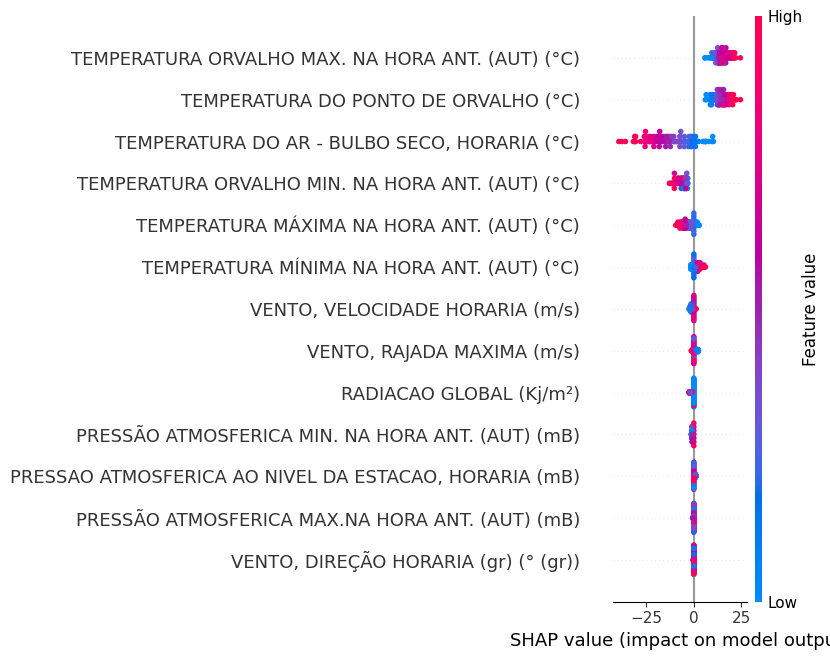

In [58]:
shap.summary_plot(shap_values, X_umid_test[:100])

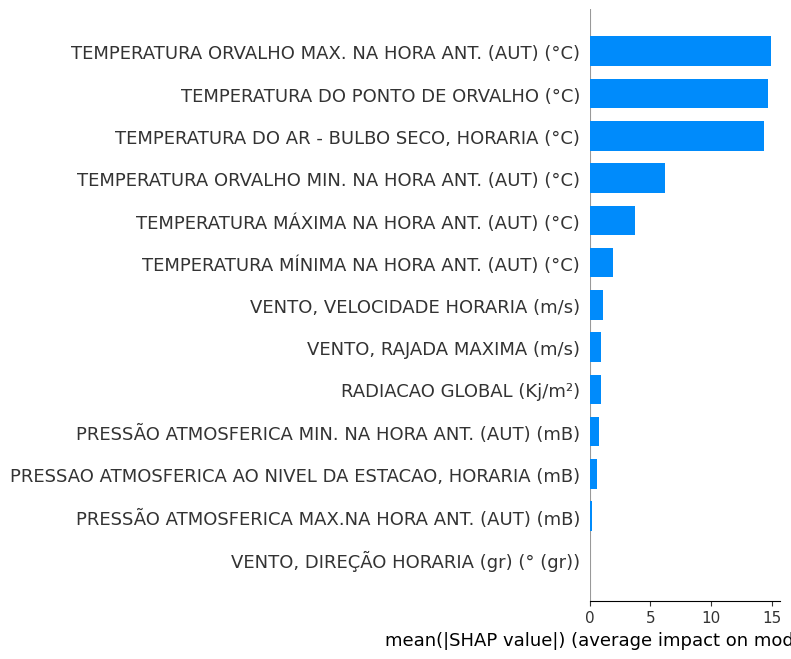

In [59]:
shap.summary_plot(shap_values, X_umid_test[:100], plot_type="bar", feature_names=X_umid.columns)
